In [15]:
pip install tensor flow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensor-0.3.6.tar.gz (50 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached flow-0.1.2.tar.gz (139 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\coco2\AppData\Local\Temp\pip-install-1ug83er_\flow_e7389a7834c44ed6b8c6d992c3445ee3\setup.py", line 35, in <module>
      long_description = f.read()
    File "C:\ProgramData\Anaconda3\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2601: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above

In [16]:
#Import modules
import tensorflow as tf
from tensorflow import keras
import os, datetime

In [17]:
mnist = tf.keras.datasets.mnist

In [18]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


Shape is: (28, 28)


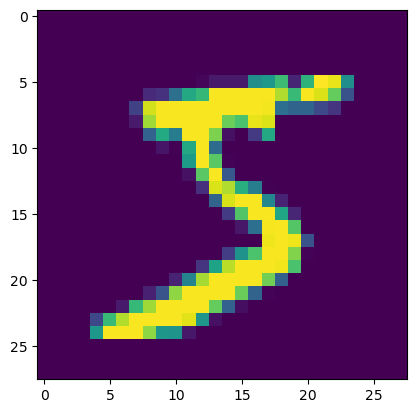

First Digit in y_train is 5


In [19]:
print("Shape is:", x_train[0].shape)
#print("Sample data from data set is:\n",x_train[0])
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print("First Digit in y_train is",y_train[0])

In [24]:
x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train[0]

In [29]:
#def create_model():
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation='softmax')])

In [31]:
#model=create_model()
# Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [33]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [35]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
checkpoint_path, monitor='val_acc', verbose=1, save_weights_only=True,
# Save weights, every epoch.
save_freq='epoch')

In [36]:
history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test), callbacks=[tensorboard_callback, checkpoint_callback])
loss, acc = model.evaluate(x_test, y_test,verbose=1)
print("Original model, accuracy: {:5.2f}%".format(100*acc))

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 2.3015 - accuracy: 0.1115
Epoch 1: saving model to training_2\cp-0001.ckpt
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3007 - val_accuracy: 0.1135
Epoch 2/5
1868/1875 [============================>.] - ETA: 0s - loss: 2.3008 - accuracy: 0.1124
Epoch 2: saving model to training_2\cp-0002.ckpt
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3008 - accuracy: 0.1124 - val_loss: 2.2997 - val_accuracy: 0.1135
Epoch 3/5
1873/1875 [============================>.] - ETA: 0s - loss: 2.2987 - accuracy: 0.1123
Epoch 3: saving model to training_2\cp-0003.ckpt
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2987 - accuracy: 0.1124 - val_loss: 2.2968 - val_accuracy: 0.1135
Epoch 4/5
1871/1875 [============================>.] - ETA: 0s - loss: 2.2915 - accuracy: 0.1262
Epoch 4: saving model to training_2\cp-0004.ckpt
1875/1875 [===

In [37]:
model.save('MyModel',save_format='tf')

INFO:tensorflow:Assets written to: MyModel\assets


INFO:tensorflow:Assets written to: MyModel\assets


In [38]:
loaded_model = tf.keras.models.load_model('MyModel')
loaded_loss, loaded_acc = loaded_model.evaluate(x_test, y_test,verbose=1)
print("Loaded model, accuracy: {:5.2f}%".format(100*loaded_acc))

313/313 [==============================] - 1s 2ms/step - loss: 2.2578 - accuracy: 0.1600
Loaded model, accuracy: 16.00%


In [39]:
#%load_ext tensorboard

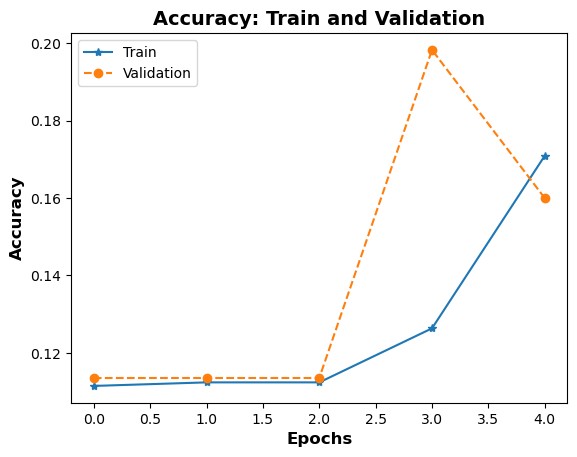

In [40]:
#%tensorboard --logdir logs

# Plot accuracy and loss
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'],'-*')
plt.plot(history.history['val_accuracy'],'--o')
plt.title('Accuracy: Train and Validation', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.legend(["Train","Validation"], loc="upper left")
plt.show()
# summarize history for accuracy
# plt.plot(history.history['loss'],'-*')
# plt.plot(history.history['val_loss'],'--o')
# plt.title('Loss: Train and Validation', fontsize=14, fontweight='bold')
# plt.ylabel('Loss', fontsize=12, fontweight='bold')
# plt.xlabel('Epochs', fontsize=12, fontweight='bold')
# plt.legend(["Train","Validation"], loc="upper left")
# plt.show()